In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk

from nltk.corpus import stopwords

In [2]:
stopwords_eng = stopwords.words("english")

lemmatizer = nltk.WordNetLemmatizer()

In [3]:
imdb_data = pd.read_csv("imdb_top_1000.csv")

In [4]:
imdb_data["Gross"] = imdb_data["Gross"].apply(lambda x: float(x.replace(",", "")) if isinstance(x, str) else x)
imdb_data["Released_Year"] = pd.to_datetime(imdb_data["Released_Year"], format="%Y", errors="coerce")
imdb_data["Runtime"] = imdb_data["Runtime"].apply(lambda x: int(x.split()[0]))
imdb_data["Genre"] = imdb_data["Genre"].apply(lambda x: x.split(", "))

### Preprocessing

In [5]:
imdb_data["Overview_processed"] = imdb_data["Overview"].apply(lambda x: x.lower()).apply(nltk.word_tokenize)
imdb_data["Overview_processed"] = imdb_data["Overview_processed"].apply(lambda x: [word for word in x if word not in stopwords_eng])
imdb_data["Overview_processed"] = imdb_data["Overview_processed"].apply(lambda x: [word for word in x if word.isalnum()])
imdb_data["Overview_processed"] = imdb_data["Overview_processed"].apply(lambda x: [word for word in x if not word.isdigit()])
imdb_data["Overview_processed"] = imdb_data["Overview_processed"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [6]:
imdb_data["Overview_length_words"] = imdb_data["Overview_processed"].apply(len)
imdb_data["Overview_length_chars"] = imdb_data["Overview_processed"].apply(lambda x: sum(len(word) for word in x))

In [7]:
imdb_data.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Overview_length_words,Overview_length_chars
count,999,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02,1000.000000,1000.000000
mean,1991-03-21 11:00:10.810810880,122.891000,7.949300,77.971530,2.736929e+05,6.803475e+07,13.945000,85.149000
min,1920-01-01 00:00:00,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03,4.000000,22.000000
25%,1976-01-01 00:00:00,103.000000,7.700000,70.000000,5.552625e+04,3.253559e+06,11.000000,67.000000
50%,1999-01-01 00:00:00,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07,13.000000,83.000000
75%,2009-01-01 00:00:00,137.000000,8.100000,87.000000,3.741612e+05,8.075089e+07,16.000000,100.000000
max,2020-01-01 00:00:00,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08,33.000000,192.000000
std,NaN,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08,4.256065,25.684674


<Axes: >

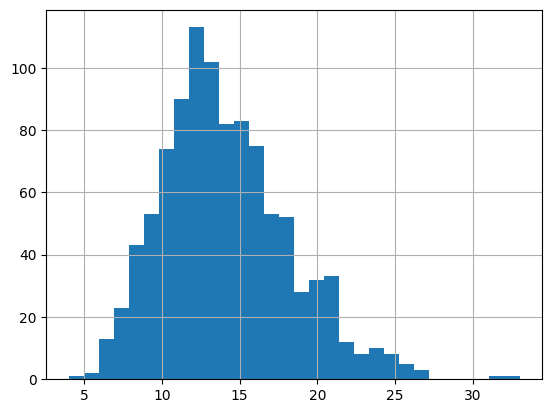

In [8]:
imdb_data["Overview_length_words"].hist(bins=30)

<Axes: >

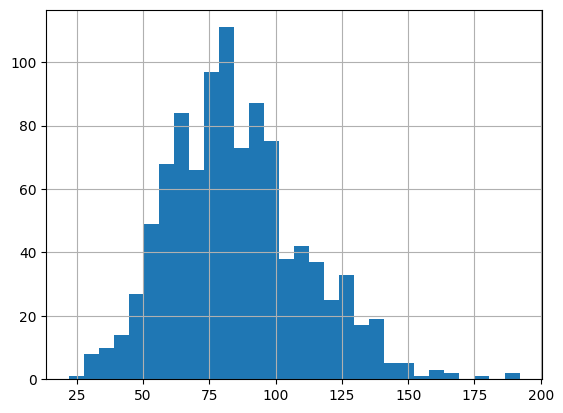

In [9]:
imdb_data["Overview_length_chars"].hist(bins=30)